In [2]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import moth_brain_nengo
import nengo

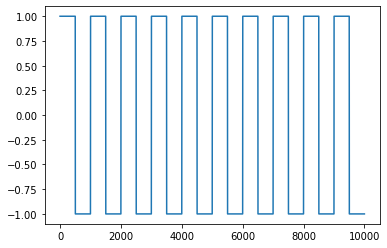

In [3]:
t = np.linspace(0, 10, 10000, endpoint=False)
sq = signal.square(2 * np.pi  * t)
plt.plot(sq)

new_sq_left=[]
for idx,tm in enumerate(t):
    if(int(tm%4)) ==3: 
        new_sq_left.append(0)
    else:
        if sq[idx] < 0:
            new_sq_left.append(0)
        else:
            new_sq_left.append(1)

for idx,tm in enumerate(new_sq_left):
    if(idx%500)< 250:
        new_sq_left[idx]=0
        
new_sq_right=[]
for idx,tm in enumerate(t):
    if(int(tm%4)) !=3: 
        new_sq_right.append(0)
    else:
        if sq[idx] < 0:
            new_sq_right.append(0)
        else:
            new_sq_right.append(1)

for idx,tm in enumerate(new_sq_right):
    if(idx%500)< 250:
        new_sq_right[idx]=0

def find_left(t):
    idx = int(t * 1000)
    if(idx)> 9999:
        idx=9999
    return new_sq_left[idx]
def find_right(t):
    idx = int(t * 1000)
    if(idx)> 9999:
        idx=9999
    return new_sq_right[idx]

In [18]:
def flipflop(x): 
    if x > 0.2: #if trigger
        #return -2*x[0] + 1 #return +/-1
        # cheat for dev
        if x > 0.5:
            return -1
        else:
            return 1
    else:
        return 0
        
def stay(x):#cheating for dev
    if x > 0.5:
        return 1
    else:
        return 0

In [37]:
with nengo.Network() as model_naive:
    
    N=100
    syn=0.03
    
    in_left=nengo.Node(find_left)
    inputL = nengo.Node(None, size_in=1)
    nengo.Connection(in_left, inputL ,transform = 1, synapse=None)
    
    
    
    stateL1 = nengo.Ensemble(N,1)## max_rates = nengo.dists.Uniform(80, 200),
                        #intercepts = nengo.dists.Uniform(0,1))
    stateL0 = nengo.Ensemble(N,1, max_rates = nengo.dists.Uniform(80, 200),
                        intercepts = nengo.dists.Uniform(0,1))
    
    nengo.Connection(inputL, stateL1, synapse=syn) 
    nengo.Connection(stateL1, stateL0, synapse=syn, function=flipflop)
    
    input_left_probe = nengo.Probe(inputL)
    FF_left_probe0 = nengo.Probe(stateL0)
    FF_left_probe1 = nengo.Probe(stateL1)
   
        

            

In [38]:
with nengo.Simulator(model_naive) as sim_naive:
    sim_naive.run(10)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

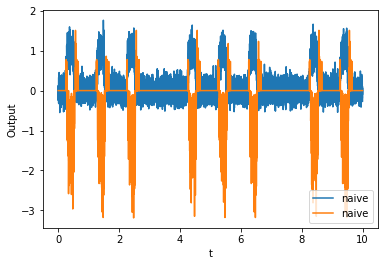

In [39]:
t = sim_naive.trange()
plt.figure()
#plt.plot(t, sim_naive.data[input_left_probe], label="naive")
plt.plot(t, sim_naive.data[FF_left_probe1], label="naive")
plt.plot(t, sim_naive.data[FF_left_probe0], label="naive")
#plt.plot(t, flipflop(stimulus_fn(t)), "--", c="black", label="ideal")
plt.xlabel("t")
plt.ylabel("Output")
plt.legend(loc="best")

Text(0, 0.5, 'Firing rate [Hz]')

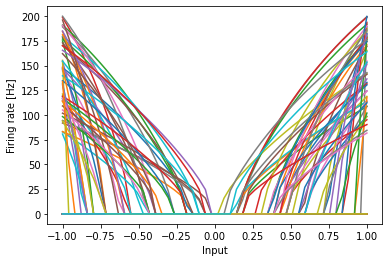

In [40]:
plt.figure()
plt.plot(*nengo.utils.ensemble.tuning_curves(stateL0, sim_naive))
plt.xlabel("Input")
plt.ylabel("Firing rate [Hz]")